# MODEL PREDIKSI RISIKO KREDIT
#### Yemima Sipayung

> Risiko kredit adalah suatu risiko kerugian yang dialami perusahaan yang disebabkan oleh ketidakmampuan dari debitur atas kewajiban pembayaran utangnya, baik utang pokok maupun bunga, ataupun keduanya. Salah satu faktor penyebab terjadinya risiko kredit adalah kesalahan penilaian dalam keputusan pemberian pinjaman. Untuk meminimalkan kemungkinan terjadinya kerugian tersebut, perlu dilakukan pengurangan tingkat risiko dengan meningkatkan kehati-hatian dan memperhatikan berbagai faktor yang menyebabkan terjadinya risiko kredit dalam pemberian pinjaman kepada peminjamnya. Pada kesempatan kali ini, akan dilakukan analisis prediksi tingkat risiko kredit berdasarkan data historis atas transaksi yang pernah dilakukan oleh peminjam. Penelitian ini bertujuan untuk membuat model prediksi tingkat risiko kredit dengan menggunakan algoritma machine learning.

**Features Dictionary**
- 'id': A unique LC assigned ID for the loan listing.
- 'member_id': borrower member
- 'loan_amnt': Last month payment was
- 'funded_amnt': The total amount committed to that loan at that point in time
- 'funded_amnt_inv': The total amount committed to that loan at that point funded by investors
- 'term': The number of payments on the loan. Values are in months and can be either 36 or 60.
- 'int_rate': Indicates if income was verified by LC, not verified, or if the income source was verified
- 'installment': The monthly payment owed by the borrower if the loan originates
- 'grade': LC assigned loan grade
- 'sub_grade': LC assigned loan subgrade
- 'emp_title': The job title supplied by the Borrower when applying for the loan.*
- 'emp_length': Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- 'home_ownership': The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- 'annual_inc': The self-reported annual income provided by the borrower during registration.
- 'verification_status': Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- 'issue_d': The month which the loan was funded
- 'loan_status': Current status of the loan
- 'pymnt_plan': Indicates if a payment plan has been put in place for the loan
- 'url': URL for the LC page with listing data.
- 'desc': Loan description provided by the borrower
- 'purpose': A category provided by the borrower for the loan request. 
- 'title': The loan title provided by the borrower
- 'zip_code': The first 3 numbers of the zip code provided by the borrower in the loan application.
- 'addr_state': The state provided by the borrower in the loan application
- 'dti': A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- 'delinq_2yrs': The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- 'earliest_cr_line': The date the borrower's earliest reported credit line was opened
- 'inq_last_6mths': Number of credit inquiries in past 6 months
- 'mths_since_last_delinq': The number of months since the borrower's last delinquency
- 'mths_since_last_record': The number of months since the last public record.
- 'open_acc': The number of open credit lines in the borrower's credit file.
- 'pub_rec': Number of derogatory public records
- 'revol_bal': Total credit revolving balance
- 'revol_util': Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.        
- 'total_acc': The total number of credit lines currently in the borrower's credit file
- 'initial_list_status':
- 'out_prncp': Remaining outstanding principal for total amount funded
- 'out_prncp_inv': Remaining outstanding principal for portion of total amount funded by investors
- 'total_pymnt': Payments received to date for total amount funded
- 'total_pymnt_inv': Payments received to date for portion of total amount funded by investors
- 'total_rec_prncp': Principal received to date
- 'total_rec_int': Interest received to date
- 'total_rec_late_fee': Late fees received to date
- 'recoveries': Indicates if a payment plan has been put in place for the loan
- 'collection_recovery_fee': post charge off collection fee
- 'last_pymnt_d': Last month payment was received
- 'last_pymnt_amnt': Last total payment amount received
- 'next_pymnt_d': Next scheduled payment date
- 'last_credit_pull_d': The most recent month LC pulled credit for this loan
- 'collections_12_mths_ex_med': Number of collections in 12 months excluding medical collections
- 'mths_since_last_major_derog': Months since most recent 90-day or worse rating
- 'policy_code': publicly available policy_code=1, new products not publicly available policy_code=2
- 'application_type': Indicates whether the loan is an individual application or a joint application with two co-borrowers
- 'acc_now_delinq': The number of accounts on which the borrower is now delinquent.
- 'tot_coll_amt': Total collection amounts ever owed
- 'tot_cur_bal': Total current balance of all accounts
- 'total_rev_hi_lim': Total revolving high credit/credit limit

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## OVERVIEW

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv', low_memory = False)

In [3]:
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

>Data yang digunakan memiliki 75 kolom dan 466285 baris.Terdapat kolom yang tidak memiliki nilai sama sekali, dan beberapa kolom yang memiliki null values.

In [6]:
# pd.set_option('display.max_rows', None)

In [7]:
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique())) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Unnamed: 0,int64,0,466285,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,id,int64,0,466285,"[1077501, 1077430, 1077175, 1076863, 1075358, ..."
2,member_id,int64,0,466285,"[1296599, 1314167, 1313524, 1277178, 1311748, ..."
3,loan_amnt,int64,0,1352,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
4,funded_amnt,int64,0,1354,"[5000, 2500, 2400, 10000, 3000, 7000, 5600, 53..."
...,...,...,...,...,...
70,all_util,float64,466285,0,[nan]
71,total_rev_hi_lim,float64,70276,14612,"[nan, 59900.0, 15100.0, 61100.0, 8100.0, 15400..."
72,inq_fi,float64,466285,0,[nan]
73,total_cu_tl,float64,466285,0,[nan]


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [9]:
df.describe(include = object).T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


## PREPROCESS

Hapus kolom yang semua datanya adalah null, tidak unique, dan yang tidak dibutuhkan dalam model.

In [10]:
df.dropna(axis=1, how='all', inplace=True)

In [11]:
df.shape

(466285, 58)

In [12]:
leakage_col = ['issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                'total_rec_prncp', 'total_rec_int', 'recoveries', 'collection_recovery_fee', 
                'last_pymnt_d', 'last_pymnt_amnt']
df.drop(columns=leakage_col, axis=1, inplace=True)

leakage_col merupakan kolom dengan data yang tidak kita butuhkan untuk dalam data training. Kita tidak akan memperoleh data ini sebelum peminjam melakukan pinjaman. Contohnya pada kolom 'out_prncp'atau pokok pinjaman, data ini akan berisi nol jika peminjam sudah menyelesaikan seluruh pinjaman, dan akan bernilai (selain nol) pada saat pinjaman dilakukan.

In [13]:
df.drop(columns = ['policy_code', 'application_type', 'Unnamed: 0', 
                   'id', 'member_id', 'title', 'url', 
                   'zip_code', 'desc', 'sub_grade', 'mths_since_last_delinq',
                  'mths_since_last_record', 'next_pymnt_d', 
                   'mths_since_last_major_derog'], axis=1, inplace = True) # menghapus kolom yang datanya tidak dibutuhkan

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  loan_status                 466285 non-null  object 
 13  purpose       

1. term

In [15]:
df['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [16]:
df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))

In [17]:
df['term'].unique()

array([36, 60], dtype=int64)

2. emp_length

In [18]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

In [20]:
df['emp_length'] = df['emp_length'].map(emp_map).fillna('0').astype(int)
df['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

3. earliest_cr_line

In [21]:
df['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [22]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') # asumsikan bahwa skrg tgl 31 des 2017
                                                         - df['earliest_cr_line_date']) 
                                                        / np.timedelta64(1, 'M'))) # menghitung brp bulan perbedaan dilakukan credit line terakhir dgn sekarang dan convert to numeric

In [23]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        240.482430
std          93.974829
min        -611.000000
25%         184.000000
50%         226.000000
75%         286.000000
max         588.000000
Name: mths_since_earliest_cr_line, dtype: float64

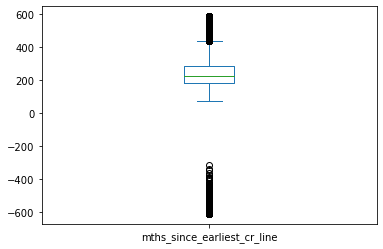

In [24]:
df['mths_since_earliest_cr_line'].plot.box()
plt.show()

In [25]:
df.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 
            'mths_since_earliest_cr_line']][df['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-536.0
1770,Sep-68,2068-09-01,-608.0
2799,Sep-64,2064-09-01,-560.0
3282,Sep-67,2067-09-01,-596.0
3359,Feb-65,2065-02-01,-565.0
...,...,...,...
464003,Jan-68,2068-01-01,-600.0
464260,Jul-66,2066-07-01,-582.0
465100,Oct-67,2067-10-01,-597.0
465500,Sep-67,2067-09-01,-596.0


Dapat dilihat bahwa pada kolom 'mths_since_earliest_cr_line' merupakan outlier dengan data datetime-nya yaitu > 2016 (belum terjadi pada saat data dikumpulkan)

In [26]:
df['earliest_cr_line_date'] = df['earliest_cr_line_date'].astype(str)
df['earliest_cr_line_date'][df['mths_since_earliest_cr_line'] < 0] = df['earliest_cr_line_date'][df['mths_since_earliest_cr_line'] < 0].str.replace('20','19')

C:\Users\yemim\AppData\Local\Temp\ipykernel_22872\1539702680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earliest_cr_line_date'][df['mths_since_earliest_cr_line'] < 0] = df['earliest_cr_line_date'][df['mths_since_earliest_cr_line'] < 0].str.replace('20','19')


Mengubah data tsb menjadi string dan mengganti 20 menjadi 19, contoh: 2068 menjadi 1968

In [27]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line_date'])
df['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [28]:
df['mths_since_earliest_cr_line_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

df['mths_since_earliest_cr_line_date'].describe()

count    466256.000000
mean        243.491078
std          86.928944
min          74.000000
25%         185.000000
50%         227.000000
75%         286.000000
max         888.000000
Name: mths_since_earliest_cr_line_date, dtype: float64

In [29]:
df.drop(columns = ['earliest_cr_line_date' ,'mths_since_earliest_cr_line', 
                   'earliest_cr_line'], inplace = True)

4. last_credit_pull_d

In [30]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], 
                                          format = '%b-%y').fillna(pd.to_datetime("2016-01-01"))


df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-31') - df['last_credit_pull_d']) / np.timedelta64(1, 'M')))

In [31]:
df.drop(columns = ['last_credit_pull_d'], inplace = True)

In [32]:
df['mths_since_last_credit_pull_d'].describe()

count    466285.000000
mean         28.045223
std           9.636066
min          24.000000
25%          24.000000
50%          24.000000
75%          26.000000
max         128.000000
Name: mths_since_last_credit_pull_d, dtype: float64

Cek missing value pada kolom lain

In [33]:
df.isnull().sum()

loan_amnt                               0
funded_amnt                             0
funded_amnt_inv                         0
term                                    0
int_rate                                0
installment                             0
grade                                   0
emp_title                           27588
emp_length                              0
home_ownership                          0
annual_inc                              4
verification_status                     0
loan_status                             0
purpose                                 0
addr_state                              0
dti                                     0
delinq_2yrs                            29
inq_last_6mths                         29
open_acc                               29
pub_rec                                29
revol_bal                               0
revol_util                            340
total_acc                              29
initial_list_status               

1. total columns

In [34]:
total_cols = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

In [35]:
df[total_cols].isnull().sum()*100/len(df)

tot_coll_amt        15.071469
tot_cur_bal         15.071469
total_rev_hi_lim    15.071469
dtype: float64

In [36]:
# cek kolom total yang memiliki jumlah null values yang sama
df[total_cols].head()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [37]:
df[total_cols].sample(10)

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
348038,0.0,42725.0,20800.0
86825,6084.0,295407.0,14600.0
115838,0.0,83999.0,40600.0
106862,0.0,147701.0,16200.0
133762,0.0,9077.0,14000.0
360859,417.0,263334.0,52000.0
3273,NaN,NaN,NaN
46005,0.0,28061.0,16250.0
297165,0.0,387607.0,75000.0
317634,0.0,56265.0,40429.0


Dari tabel sample acak tsb dapat dilihat bahwa null values dari ketika kolom tsb berada pada index (data) yang sama

In [38]:
df[total_cols].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.919135e+02,1.388017e+05,3.037909e+04
std,1.463021e+04,1.521147e+05,3.724713e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.861800e+04,1.350000e+04
50%,0.000000e+00,8.153900e+04,2.280000e+04
75%,0.000000e+00,2.089530e+05,3.790000e+04
max,9.152545e+06,8.000078e+06,9.999999e+06


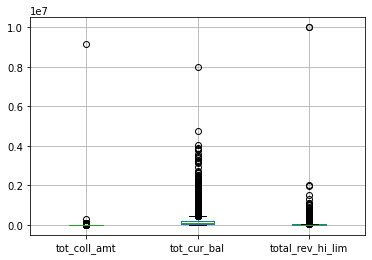

In [39]:
df[total_cols].boxplot()
plt.show()

Dari `.info`, `.describe` dan boxplot di atas, dapat dilihat bahwa ketiga kolom tsb memiliki sebaran data yg cukup berbeda sehingga tidak memungkinkan kita untuk mengisi missing values tersebut dan memilih untuk menghapus missing values tsb.

In [40]:
df.dropna(subset = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'], inplace = True)

In [41]:
df.reset_index(drop= True, inplace = True)

2. 'revol_util'

In [42]:
df['revol_util'] = df['revol_util'].fillna(df ['revol_util'].median())

3. 'emp_title'

In [43]:
df['emp_title'] = df['emp_title'].fillna('other')

In [44]:
df.isna().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_title                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
loan_status                         0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc                           0
initial_list_status                 0
total_rec_late_fee                  0
collections_12_mths_ex_med          0
acc_now_deli

### Formatting target feature

In [45]:
df['loan_status'].value_counts()

Current               220639
Fully Paid            131050
Charged Off            32456
Late (31-120 days)      6779
In Grace Period         3080
Late (16-30 days)       1191
Default                  814
Name: loan_status, dtype: int64

In [46]:
ambigu = ['Current', 'In Grace Period']
good_loan =  ['Fully Paid']

df = df[df.loan_status.isin(ambigu) == False]
df['good_risky_loan'] = np.where(df['loan_status'].isin(good_loan), 'good', 'risky')

In [47]:
df = df.drop(['loan_status'], axis = 1)

## EXPLORATORY DATA ANALYSIS

### TARGET FEATURE

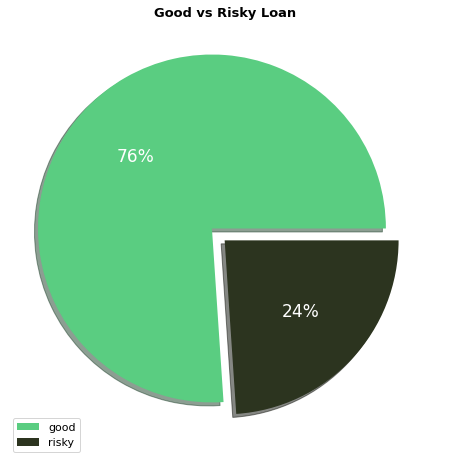

In [48]:
colorp = ["#5ACD81", "#2C341F"]
plt.figure(figsize = (12, 8))

plt.title('Good vs Risky Loan', size = 13, fontweight = 'bold', color = 'black')
labels = 'good', 'risky'
plt.pie(df['good_risky_loan'].value_counts(), autopct = '%.0f%%', 
        textprops = {'color': 'w', 'fontsize': 17}, colors = colorp, explode = (0.1,0), shadow = True)
plt.legend(labels, loc='lower left', fontsize = 11)

plt.savefig('good_risk.png')
plt.show()

In [49]:
df['good_risky_loan'].value_counts()

good     131050
risky     41240
Name: good_risky_loan, dtype: int64

### CATEGORICAL & NUMERICAL FEATURES

In [50]:
df_cat = df.select_dtypes(['object'])
df_con = df.drop(columns = df_cat.columns)

#### Numerical Features

In [51]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172290 entries, 3 to 396007
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loan_amnt                         172290 non-null  int64  
 1   funded_amnt                       172290 non-null  int64  
 2   funded_amnt_inv                   172290 non-null  float64
 3   term                              172290 non-null  int64  
 4   int_rate                          172290 non-null  float64
 5   installment                       172290 non-null  float64
 6   emp_length                        172290 non-null  int32  
 7   annual_inc                        172290 non-null  float64
 8   dti                               172290 non-null  float64
 9   delinq_2yrs                       172290 non-null  float64
 10  inq_last_6mths                    172290 non-null  float64
 11  open_acc                          172290 non-null  f

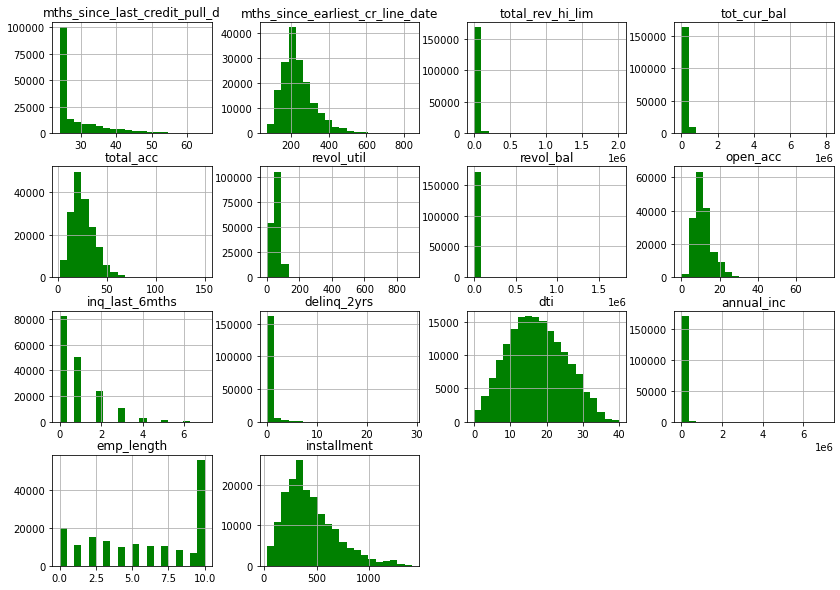

In [52]:
num_cols = ['mths_since_last_credit_pull_d', 'mths_since_earliest_cr_line_date', 'total_rev_hi_lim', 'tot_cur_bal', 'total_acc', 'revol_util', 'revol_bal', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'dti', 'annual_inc', 'emp_length', 'installment']
df_con[num_cols].hist(bins=20, figsize=(14,10), color='green')
plt.show()

In [53]:
def risk_percentage(x, size, rot):
    plt.style.use('ggplot')
    ratio = (df.groupby(x)['good_risky_loan']
         .value_counts(normalize=True) # kalkulasi ratio
         .mul(100) # multiply by 100 to be percent
         .rename('% risky')
         .reset_index())
    plt.figure(figsize = size)
    sns.barplot(data=ratio[ratio['good_risky_loan'] == 'risky'], x=x, y='% risky', palette = 'mako')
    plt.title(x)
    plt.xticks(rotation = rot)
    plt.savefig(x+".png")
    plt.show()

In [54]:
df_con.nunique()

loan_amnt                             1281
funded_amnt                           1281
funded_amnt_inv                       1378
term                                     2
int_rate                               145
installment                          32956
emp_length                              11
annual_inc                           13904
dti                                   3911
delinq_2yrs                             23
inq_last_6mths                           8
open_acc                                57
pub_rec                                 12
revol_bal                            42209
revol_util                            1106
total_acc                              100
total_rec_late_fee                    2371
collections_12_mths_ex_med               7
acc_now_delinq                           6
tot_coll_amt                          3713
tot_cur_bal                         125106
total_rev_hi_lim                      9194
mths_since_earliest_cr_line_date       624
mths_since_

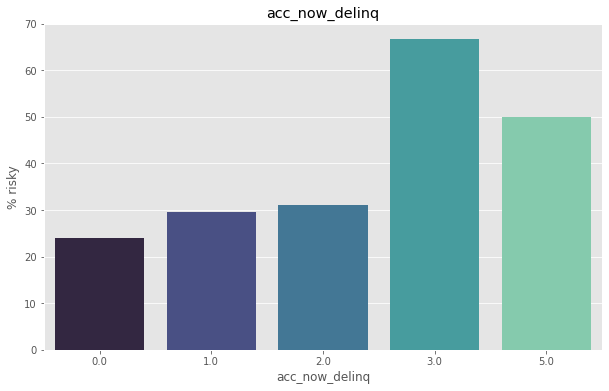

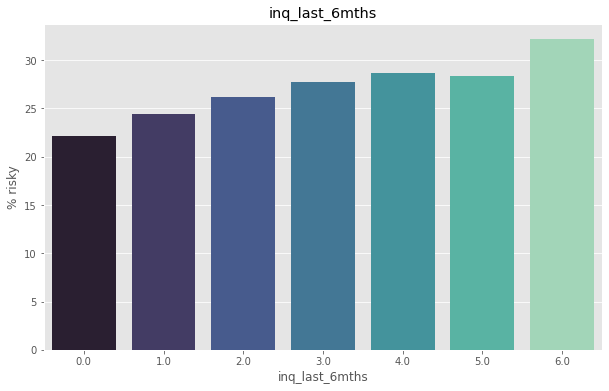

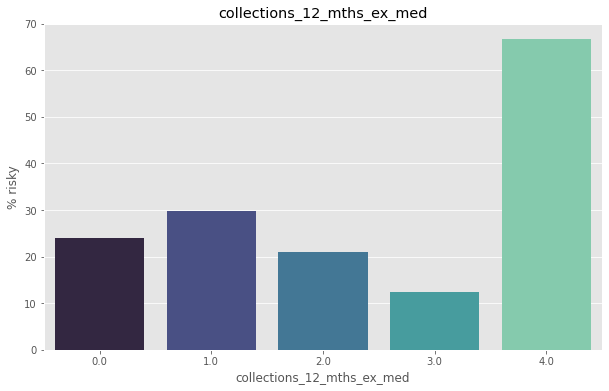

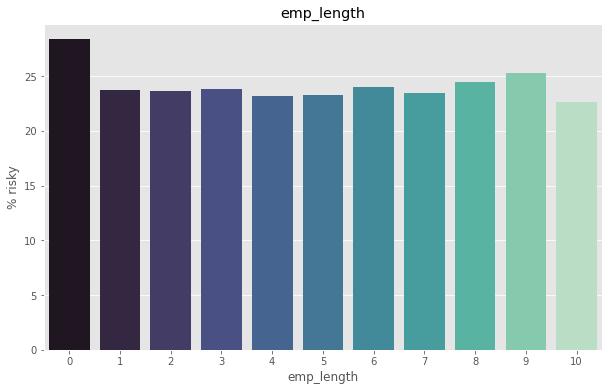

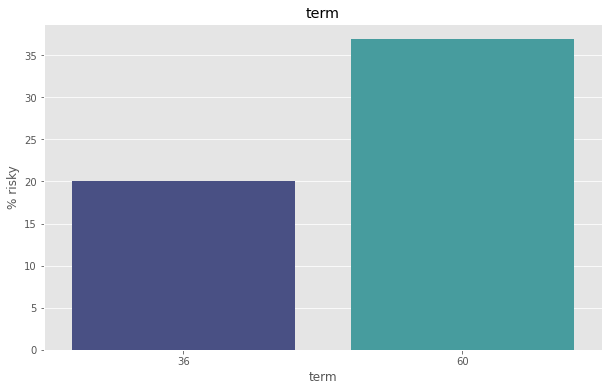

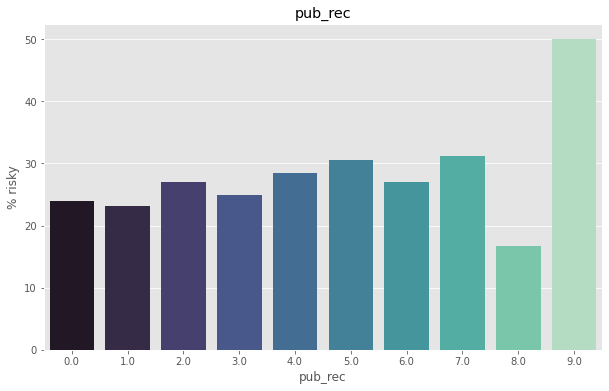

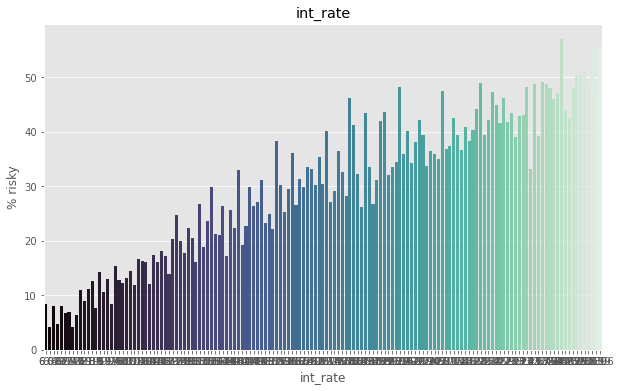

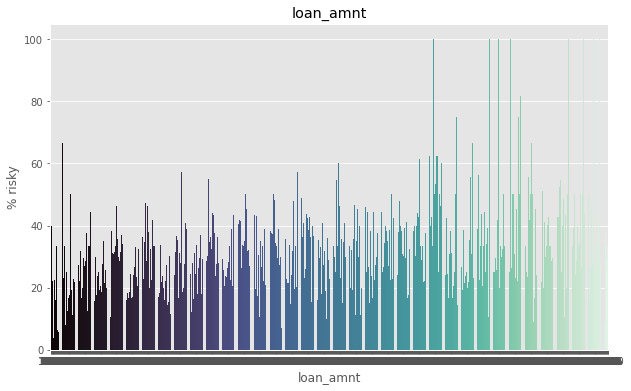

In [55]:
filt_con = ['acc_now_delinq', 'inq_last_6mths', 'collections_12_mths_ex_med', 
            'emp_length', 'term', 'pub_rec', 'int_rate', 'loan_amnt']
for columnss in filt_con:
    risk_percentage(columnss, (10,6), 0)
   

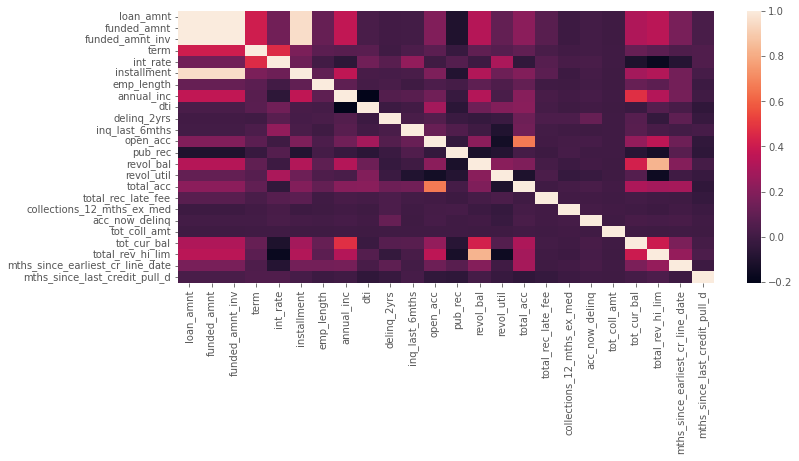

In [56]:
plt.figure(figsize=(12,5))
sns.heatmap(data=df_con.corr(), annot=False)
plt.savefig("con_corr.png")

In [57]:
con_corr = df_con.corr('spearman')
np.fill_diagonal(con_corr.values, np.nan)
con_corr_table = con_corr.unstack().sort_values(ascending = False).drop_duplicates().to_frame()
con_corr_table.columns = ['Correlation Coefficient']
con_corr_table.head(10)

,,Correlation Coefficient
loan_amnt,funded_amnt,1.000000
funded_amnt_inv,funded_amnt,0.999845
loan_amnt,funded_amnt_inv,0.999845
installment,funded_amnt,0.970144
loan_amnt,installment,0.970143
funded_amnt_inv,installment,0.970072
revol_bal,total_rev_hi_lim,0.776910
open_acc,total_acc,0.650716
annual_inc,tot_cur_bal,0.521970
funded_amnt_inv,annual_inc,0.489551


In [58]:
# menghapus kolom yang memiliki korelasi yang tinggi
df_con.drop(columns = ['funded_amnt', 'funded_amnt_inv'], inplace = True)

#### Categorical Features

In [59]:
df_cat.head()

,grade,emp_title,home_ownership,verification_status,purpose,addr_state,initial_list_status,good_risky_loan
3,B,On road manager,RENT,Source Verified,debt_consolidation,NM,w,good
9,B,Auditor,RENT,Verified,debt_consolidation,FL,f,good
11,A,Area Sales Manager,MORTGAGE,Source Verified,debt_consolidation,CA,w,good
14,B,driver,MORTGAGE,Verified,credit_card,MI,w,good
15,B,PARTS MANAGER,MORTGAGE,Not Verified,debt_consolidation,CO,f,risky


In [60]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172290 entries, 3 to 396007
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                172290 non-null  object
 1   emp_title            172290 non-null  object
 2   home_ownership       172290 non-null  object
 3   verification_status  172290 non-null  object
 4   purpose              172290 non-null  object
 5   addr_state           172290 non-null  object
 6   initial_list_status  172290 non-null  object
 7   good_risky_loan      172290 non-null  object
dtypes: object(8)
memory usage: 11.8+ MB


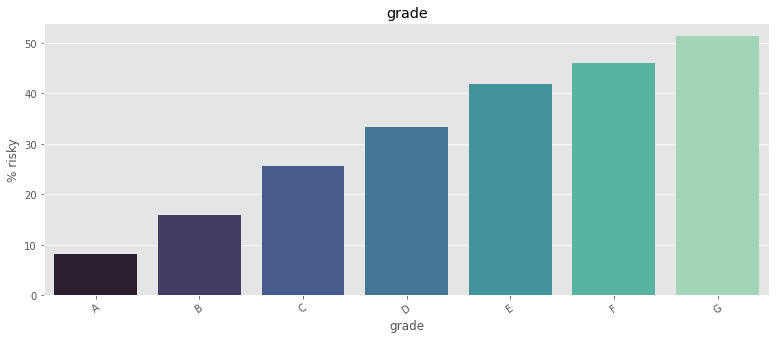

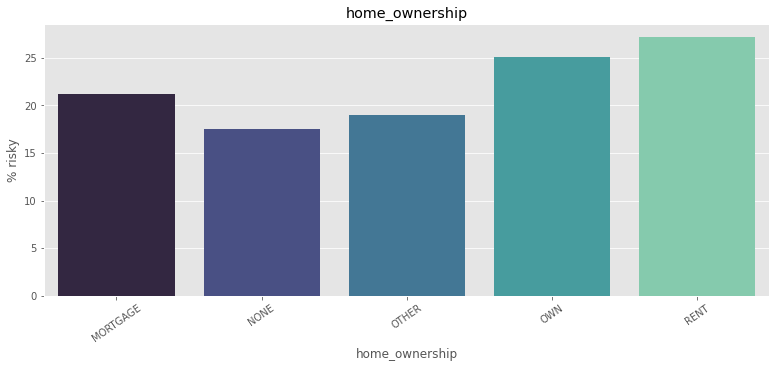

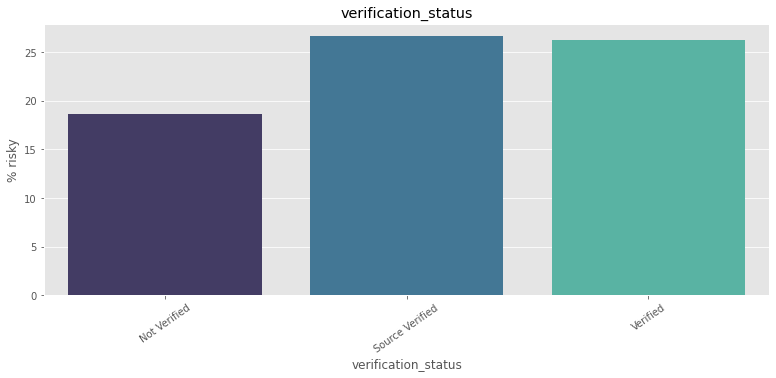

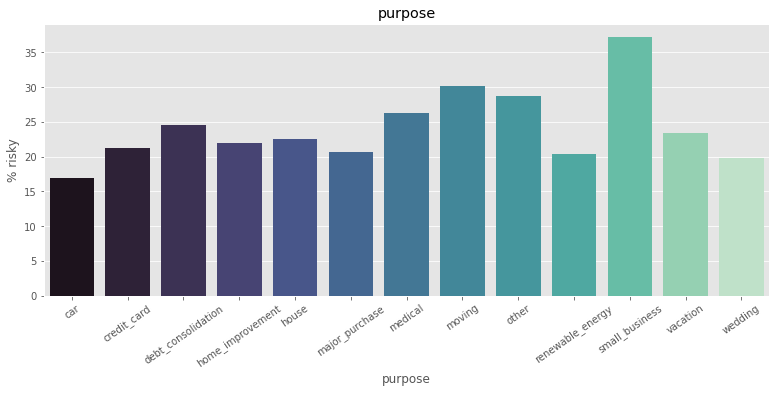

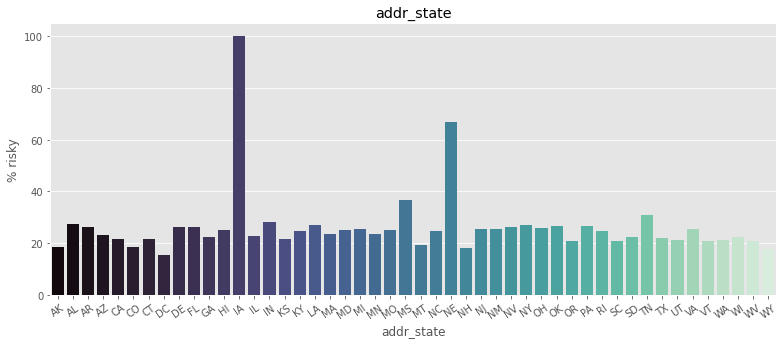

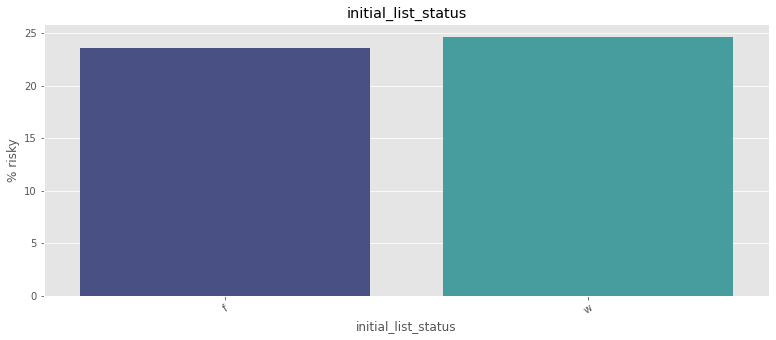

In [61]:
filt_cat = ['grade','home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']
for columnsss in filt_cat:
    risk_percentage(columnsss, (13,5), 35)       

### MODELING

#### ONE HOT ENCODING

In [62]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172290 entries, 3 to 396007
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                172290 non-null  object
 1   emp_title            172290 non-null  object
 2   home_ownership       172290 non-null  object
 3   verification_status  172290 non-null  object
 4   purpose              172290 non-null  object
 5   addr_state           172290 non-null  object
 6   initial_list_status  172290 non-null  object
 7   good_risky_loan      172290 non-null  object
dtypes: object(8)
memory usage: 11.8+ MB


In [63]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = ['grade','home_ownership', 'verification_status', 'purpose', 'initial_list_status']
onehot_cols = pd.get_dummies(df_cat[cat_cols])

In [64]:
onehot_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172290 entries, 3 to 396007
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   grade_A                              172290 non-null  uint8
 1   grade_B                              172290 non-null  uint8
 2   grade_C                              172290 non-null  uint8
 3   grade_D                              172290 non-null  uint8
 4   grade_E                              172290 non-null  uint8
 5   grade_F                              172290 non-null  uint8
 6   grade_G                              172290 non-null  uint8
 7   home_ownership_ANY                   172290 non-null  uint8
 8   home_ownership_MORTGAGE              172290 non-null  uint8
 9   home_ownership_NONE                  172290 non-null  uint8
 10  home_ownership_OTHER                 172290 non-null  uint8
 11  home_ownership_OWN                   17

In [65]:
onehot_cols.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
15,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [66]:
onehot_cols['target'] = np.where(df_cat['good_risky_loan'].str.contains("good"), 1, 0)

In [67]:
onehot_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172290 entries, 3 to 396007
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   grade_A                              172290 non-null  uint8
 1   grade_B                              172290 non-null  uint8
 2   grade_C                              172290 non-null  uint8
 3   grade_D                              172290 non-null  uint8
 4   grade_E                              172290 non-null  uint8
 5   grade_F                              172290 non-null  uint8
 6   grade_G                              172290 non-null  uint8
 7   home_ownership_ANY                   172290 non-null  uint8
 8   home_ownership_MORTGAGE              172290 non-null  uint8
 9   home_ownership_NONE                  172290 non-null  uint8
 10  home_ownership_OTHER                 172290 non-null  uint8
 11  home_ownership_OWN                   17

#### STANDARDIZATION

In [68]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172290 entries, 3 to 396007
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loan_amnt                         172290 non-null  int64  
 1   term                              172290 non-null  int64  
 2   int_rate                          172290 non-null  float64
 3   installment                       172290 non-null  float64
 4   emp_length                        172290 non-null  int32  
 5   annual_inc                        172290 non-null  float64
 6   dti                               172290 non-null  float64
 7   delinq_2yrs                       172290 non-null  float64
 8   inq_last_6mths                    172290 non-null  float64
 9   open_acc                          172290 non-null  float64
 10  pub_rec                           172290 non-null  float64
 11  revol_bal                         172290 non-null  i

In [69]:
from sklearn.preprocessing import StandardScaler

con_cols = [col for col in df_con.columns.tolist()]
ss = StandardScaler()
std_cols = pd.DataFrame(ss.fit_transform(df_con[con_cols]), columns=con_cols)

In [70]:
std_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172290 entries, 0 to 172289
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loan_amnt                         172290 non-null  float64
 1   term                              172290 non-null  float64
 2   int_rate                          172290 non-null  float64
 3   installment                       172290 non-null  float64
 4   emp_length                        172290 non-null  float64
 5   annual_inc                        172290 non-null  float64
 6   dti                               172290 non-null  float64
 7   delinq_2yrs                       172290 non-null  float64
 8   inq_last_6mths                    172290 non-null  float64
 9   open_acc                          172290 non-null  float64
 10  pub_rec                           172290 non-null  float64
 11  revol_bal                         172290 non-null  f

In [71]:
std_cols.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull_d
0,-0.272078,-0.549028,-0.201206,-0.138526,1.129554,-0.613136,-0.043316,-0.357063,-0.805824,-0.880377,...,0.539896,0.536290,-0.136015,-0.083488,-0.058123,0.686794,-0.818771,-0.735720,-0.088131,-0.682380
1,-1.378282,-0.549028,-0.355333,-1.387723,1.129554,-0.889698,0.951443,-0.357063,-0.805824,-1.290283,...,-0.083563,0.021367,-0.136015,-0.083488,-0.058123,-0.002124,-0.779318,-0.833811,0.967861,-0.682380
2,1.694506,-0.549028,-1.540749,1.756971,-0.211282,4.641546,0.163604,-0.357063,0.111951,0.759249,...,-0.066482,0.450469,-0.136015,-0.083488,-0.058123,-0.009089,4.414871,0.879281,0.469527,1.742084
3,1.202860,-0.549028,-0.201206,1.521745,1.129554,0.493113,0.630138,-0.357063,-0.805824,0.554296,...,0.877247,1.137033,-0.136015,-0.083488,-0.058123,0.015289,0.421270,-0.031565,1.300083,-0.539764
4,-0.763724,-0.549028,-0.776915,-0.731562,-1.015784,-0.742198,-0.196257,-0.357063,0.111951,-0.470471,...,-0.920535,-0.836838,2.384394,-0.083488,-0.058123,-0.009089,-0.803163,-0.290806,0.944130,-0.682380


### FINAL DATA

In [72]:
final_data = pd.concat([onehot_cols, std_cols], axis = 1).reset_index().drop('index', axis = 1)

In [73]:
final_data = final_data[final_data['target'].notna()]

In [74]:
final_data.fillna(0, inplace=True)

In [75]:
final_data.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,...,revol_util,total_acc,total_rec_late_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_earliest_cr_line_date,mths_since_last_credit_pull_d
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.877247,1.137033,-0.136015,-0.083488,-0.058123,0.015289,0.421270,-0.031565,1.300083,-0.539764
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.377626,-0.836838,-0.136015,-0.083488,-0.058123,-0.009089,-0.570668,-0.350362,-0.479679,-0.682380
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.476427,0.021367,-0.136015,-0.083488,-0.058123,-0.009089,-0.797150,-0.010546,-0.539004,0.030698
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.958209,-0.579377,-0.136015,-0.083488,-0.058123,-0.009089,1.551782,1.320692,-0.111861,0.743775
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.651508,0.021367,-0.136015,-0.083488,-0.058123,-0.009089,-0.588174,-0.416924,-0.361028,-0.682380


In [76]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172290 entries, 0 to 172289
Data columns (total 54 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   grade_A                              172290 non-null  float64
 1   grade_B                              172290 non-null  float64
 2   grade_C                              172290 non-null  float64
 3   grade_D                              172290 non-null  float64
 4   grade_E                              172290 non-null  float64
 5   grade_F                              172290 non-null  float64
 6   grade_G                              172290 non-null  float64
 7   home_ownership_ANY                   172290 non-null  float64
 8   home_ownership_MORTGAGE              172290 non-null  float64
 9   home_ownership_NONE                  172290 non-null  float64
 10  home_ownership_OTHER                 172290 non-null  float64
 11  home_ownershi

## MODELING

### DATA SPLITTING

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [78]:
# membagi variabel terikat y dan variabel bebas x
X = final_data.drop('target', axis = 1)
y = final_data['target']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [80]:
X_train.shape

(120603, 53)

In [81]:
y_train.shape

(120603,)

In [82]:
# decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
target_names = ['risky loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_dt, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

  risky loan       0.30      0.21      0.25     12452
   good loan       0.77      0.85      0.81     39235

    accuracy                           0.69     51687
   macro avg       0.54      0.53      0.53     51687
weighted avg       0.66      0.69      0.67     51687



In [83]:
# knn classifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
target_names = ['risky loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_knn, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

  risky loan       0.41      0.10      0.17     12452
   good loan       0.77      0.95      0.85     39235

    accuracy                           0.75     51687
   macro avg       0.59      0.53      0.51     51687
weighted avg       0.68      0.75      0.69     51687



In [84]:
# logistic regression
lr= LogisticRegression(max_iter=600)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
target_names = ['risky loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_lr, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

  risky loan       0.51      0.02      0.05     12452
   good loan       0.76      0.99      0.86     39235

    accuracy                           0.76     51687
   macro avg       0.64      0.51      0.45     51687
weighted avg       0.70      0.76      0.67     51687



In [96]:
lr.fit(X / np.std(X, 0), y)
importances = pd.DataFrame(data={
    'feature': X_train.columns,
    'importance': lr.coef_[0]
})
importances = importances.sort_values(by='importance', ascending=False)
importances.head(20)

,feature,importance
0,grade_A,0.445632
1,grade_B,0.263010
8,home_ownership_MORTGAGE,0.180100
13,verification_status_Not Verified,0.156075
29,initial_list_status_f,0.150682
30,initial_list_status_w,0.121207
18,purpose_debt_consolidation,0.098108
17,purpose_credit_card,0.078790
15,verification_status_Verified,0.075513
34,installment,0.069145


In [85]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
target_names = ['risky loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_nb, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

  risky loan       0.41      0.18      0.25     12452
   good loan       0.78      0.92      0.84     39235

    accuracy                           0.74     51687
   macro avg       0.60      0.55      0.55     51687
weighted avg       0.69      0.74      0.70     51687



In [86]:
# random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
target_names = ['risky loan', 'good loan']
print('Classification_Report:')
print(classification_report(y_test, y_pred_rf, target_names = target_names))

Classification_Report:
              precision    recall  f1-score   support

  risky loan       0.48      0.07      0.12     12452
   good loan       0.77      0.98      0.86     39235

    accuracy                           0.76     51687
   macro avg       0.63      0.52      0.49     51687
weighted avg       0.70      0.76      0.68     51687



In [97]:
arr_feature_importances = rf.feature_importances_
arr_feature_names = X_train.columns.values
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(20)

,feature,importance
37,dti,0.060159
49,tot_cur_bal,0.059906
43,revol_util,0.059089
42,revol_bal,0.058624
51,mths_since_earliest_cr_line_date,0.057895
50,total_rev_hi_lim,0.057371
34,installment,0.057349
36,annual_inc,0.054320
33,int_rate,0.052294
44,total_acc,0.048863


## SUMMARY

Dari kedua model klasifikasi yang telah dibuat menggunakan Logistic Regression dan Random Forest Classifier, diperoleh akurasi yang sama yaitu 76% dan tergolong baik. Jadi, model ini dapat digunakan untuk memprediksi data baru dalam rangka pengambilan keputusan apakah pengajuan peminjam tersebut dapat diterima atau ditolak berdasarkan tingkat risikonya. 
Kesalahan prediksi dari kedua model tersebut dipengaruhi oleh feature importance. Untuk model Logistic Regression, fitur yang paling penting adalah fitur kelas, kepemilikan rumah dan status verifikasi. Sedangkan, untuk model Random Forest Classifier, fitur yang paling penting adalah rasio antara total pembayaran utang bulanan peminjam dengan pendapatan bulanan peminjam, dan total saldo dari semua akun peminjam tersebut.
